# Wildfire Prediction Using Machine Learning

### A Python project created by Tyler Astle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from sklearn import ensemble, model_selection 
%matplotlib inline

In [2]:
df = pd.read_csv("wf_datatrimmed_8col.csv", 
                 encoding="utf-8", 
                 index_col=0, 
                 names=["YEAR", "CAUSE", "AREA", "LATITUDE", "LONGITUDE", "OWNER", "COUNTY"],
                 low_memory=False)

In [3]:
df['COUNTY'] = df['COUNTY'].str.upper()

In [4]:
df.head()

,YEAR,CAUSE,AREA,LATITUDE,LONGITUDE,OWNER,COUNTY
1,2005,9.0,0.10,40.036944,-121.005833,5.0,63
2,2004,1.0,0.25,38.933056,-120.404444,5.0,61
3,2004,5.0,0.10,38.984167,-120.735556,13.0,17
4,2004,1.0,0.10,38.559167,-119.913333,5.0,3
5,2004,1.0,0.10,38.559167,-119.933056,5.0,3


## Descriptive Methods

In [11]:
# Take user input, then clean data and display yearly burn area by county
def plotCountyBurnAreaPerYear():
    countystr = str.upper(input("County name: "))
    county_df = df[df['COUNTY'] == countystr]
    county_df.sort_values('YEAR')
    county_df = county_df.groupby('YEAR').AREA.sum()
    county_df.plot(x="YEAR", y="AREA", title=countystr + " COUNTY BURN AREA (ACRES)")

County name: Alameda
County name: 
County name: 
County name: 
County name: 
County name: 


KeyboardInterrupt: Interrupted by user

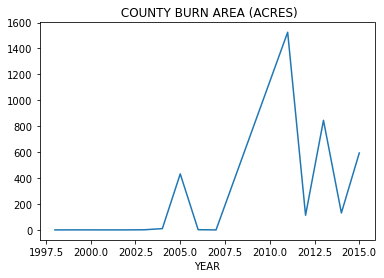

In [12]:
plotCountyBurnAreaPerYear()

In [ ]:
def plotFireIncidentMap(fires):
    fireGeoData = fires.drop(columns=['COUNTY','AREA', 'YEAR','CAUSE','OWNER'])
    
    BBox = (fires['LONGITUDE'].min(), fires['LONGITUDE'].max(),      
                    fires['LATITUDE'].min(), fires['LATITUDE'].max())
                   
    map = plt.imread('data//USmap.png')
    
    fig, ax = plt.subplots(figsize = (7, 7))
    
    ax.scatter(fires['LONGITUDE'], fires['LATITUDE']**0.98-1, zorder=1, alpha=0.2, c='r', s=0.5)
    
    ax.set_title('WILDFIRE INCIDENTS IN THE UNITED STATES')
    ax.imshow(map, zorder=0, extent=BBox, aspect=1.3)
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])

In [ ]:
plotFireIncidentMap(df)

In [ ]:
def plotTotalFiresBarChart(fires):
    fig, ax = plt.subplots(figsize = (6,6))
    
    fires = fires.sort_values('YEAR')
    fires['YEAR'].value_counts(sort=False).plot(kind='bar',title='TOTAL WILDFIRE INCIDENTS BY YEAR', color='red')
    # fires = fires.drop(columns=['AREA', 'LATITUDE', 'LONGITUDE', 'CAUSE', 'OWNER', 'COUNTY'])

In [ ]:
plotTotalFiresBarChart(df)

## Predictive Methods

In [ ]:
# Spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['COUNTY','AREA','CAUSE','OWNER']), df[['AREA']], test_size= 0.2, random_state=4)

In [ ]:
x_test

In [ ]:
regressor = ensemble.RandomForestRegressor(n_estimators=5)

In [ ]:
regressor.fit(x_train,y_train.values.ravel())

In [ ]:
def predictYearlyBurnAreaByCoordinates():
    predYear = int(input("Year: "))
    longi = float(input("Longitude: "))
    lati = float(input("Latitude: "))
    
    predEntry = pd.DataFrame([[predYear, longi, lati]], columns=['YEAR', 'LATITUDE', 'LONGITUDE'])
    pred = regressor.predict(predEntry)
    
    print("Estimated burn area: " + str(pred))

In [ ]:
predictYearlyBurnAreaByCoordinates()

In [ ]:
regressor.score(x_test, y_test)